# Experiment 1: Results of copying algorithms in dimension 2 with GB copies

In this notebook, we show results corresponding to Experiment 1, described in the thesis report. Specifically, we present the fidelities and accuracies of the Gradient Boosting copies (GB) trained with Algorithms 1 and 2 in the two-dimensional datasets, for each of the 3 different black box models considered in the experiment, comparing them to the corresponding metrics achieved by the GB hard copies. In addition, we show plots that describe the evolution of these metrics across different training dataset sizes, where computations were limited to 1,000,000 synthetic samples and 240 seconds.

As a remark, this particular notebook corresponds to the execution with seed 42. Nevertheless, the line plots that appear below have been averaged across five different seeds (41, 42, 43, 44, and 45), aiming to increase their reliability and significance.

In [1]:
# All necessary imports
import numpy as np
import os
import types
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from time import perf_counter
from sklearn.ensemble import HistGradientBoostingClassifier, HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import matplotlib.colors as mcolors
import pickle
import random
from tensorflow.keras.models import save_model, load_model
from tensorflow.keras import Model as KerasModel
from scipy.interpolate import interp1d

original_cwd = os.getcwd()
os.chdir('../utils')
from utils import *
os.chdir(original_cwd)

In [2]:
# Set the seed
seed = 42
random.seed(seed)
np.random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
tf.random.set_seed(seed)
tf.keras.utils.set_random_seed(seed)
tf.config.experimental.enable_op_determinism()

# Create a wrapper for our Neural network black boxes
def bbmodelW(x):
    if isinstance(bbmodel, tf.keras.models.Model):
        return np.where(bbmodel(x) > 0.5, 1, -1).flatten()
    return np.where(bbmodel.predict(x) > 0.5, 1, -1).flatten()

## Overlapping Gaussians dataset

### Black box 1: Random Forest classifier

In [3]:
# Load the data
with open("../results/results_DS1_1_4_seed42.pkl", "rb") as f:
    data_loaded = pickle.load(f)

# Extract and assign variables
for i in range(1, 4):
    globals()[f"model{i}"] = data_loaded[f"model{i}"]["model"]
    globals()[f"efe_{i}"] = data_loaded[f"model{i}"]["efe"]
    globals()[f"acc_{i}"] = data_loaded[f"model{i}"]["acc"]
    globals()[f"efe_unif_{i}"] = data_loaded[f"model{i}"]["efe_unif"]

# Extract and assign variables for blackbox model
bbmodel = data_loaded["blackb"]["model"]
accbb = data_loaded["blackb"]["acc"]

Results of the Black Box:
The accuracy over the test dataset is: 0.935


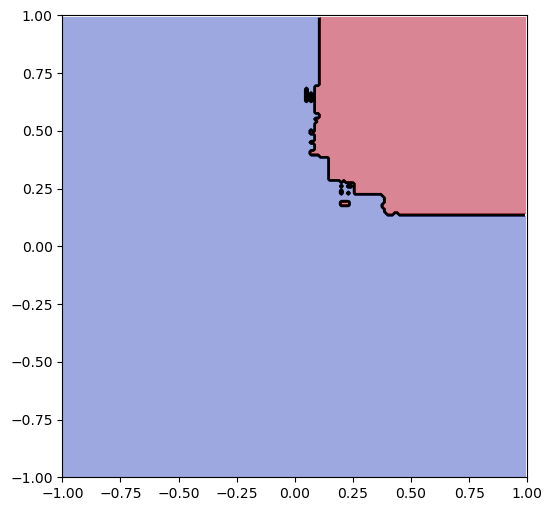

In [4]:
# bb: accuracy and plot (only seed 42)
print("Results of the Black Box:")
print("The accuracy over the test dataset is:", accbb)
plot_decision_boundary(bbmodelW)

Results of the Algorithm 1:
The empirical fidelity error over the test dataset is: 0.015
The accuracy over the test dataset is: 0.95
The empirical fidelity error over a big synthetic and uniform dataset is: 0.005716


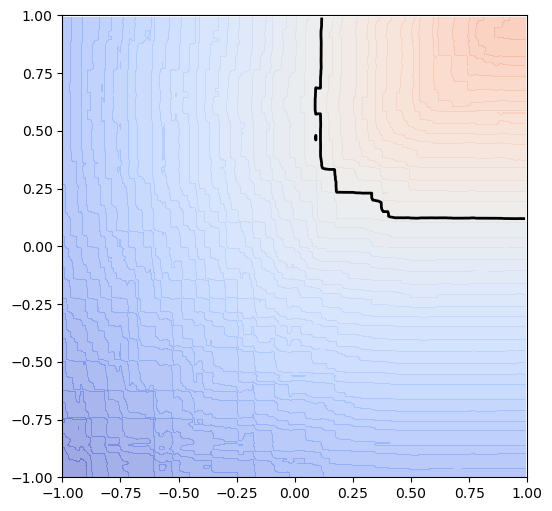

In [5]:
# model1: metrics and plot (only seed 42)
print("Results of the Algorithm 1:")
print("The empirical fidelity error over the test dataset is:", efe_1[-1])
print("The accuracy over the test dataset is:", acc_1[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_1[-1])

plot_decision_boundary(model1)

Results of the Algorithm 2:
The empirical fidelity error over the test dataset is: 0.01
The accuracy over the test dataset is: 0.945
The empirical fidelity error over a big synthetic and uniform dataset is: 0.002725


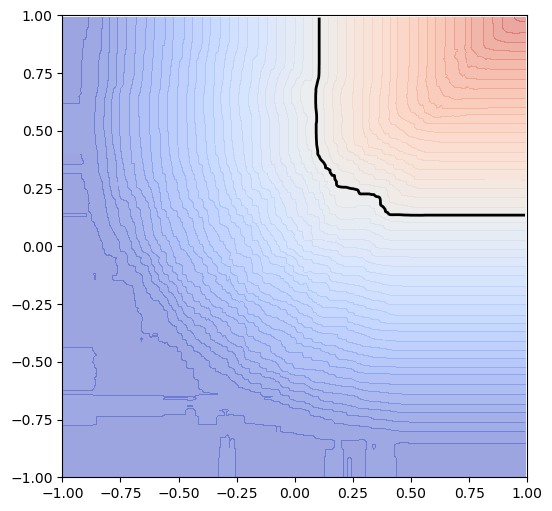

In [6]:
# model2: metrics and plot (only seed 42)
print("Results of the Algorithm 2:")
print("The empirical fidelity error over the test dataset is:", efe_2[-1])
print("The accuracy over the test dataset is:", acc_2[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_2[-1])

plot_decision_boundary(model2)

Results of the Algorithm 3:
The empirical fidelity error over the test dataset is: 0.005
The accuracy over the test dataset is: 0.94
The empirical fidelity error over a big synthetic and uniform dataset is: 0.001455


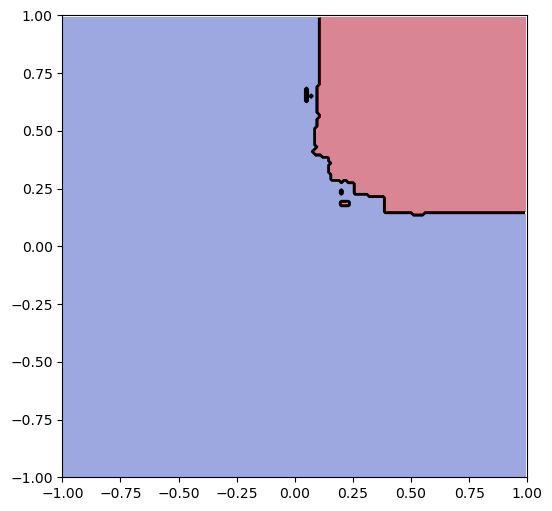

In [7]:
# model3: metrics and plot (only seed 42)
print("Results of the Algorithm 3:")
print("The empirical fidelity error over the test dataset is:", efe_3[-1])
print("The accuracy over the test dataset is:", acc_3[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_3[-1])

plot_decision_boundary(model3)

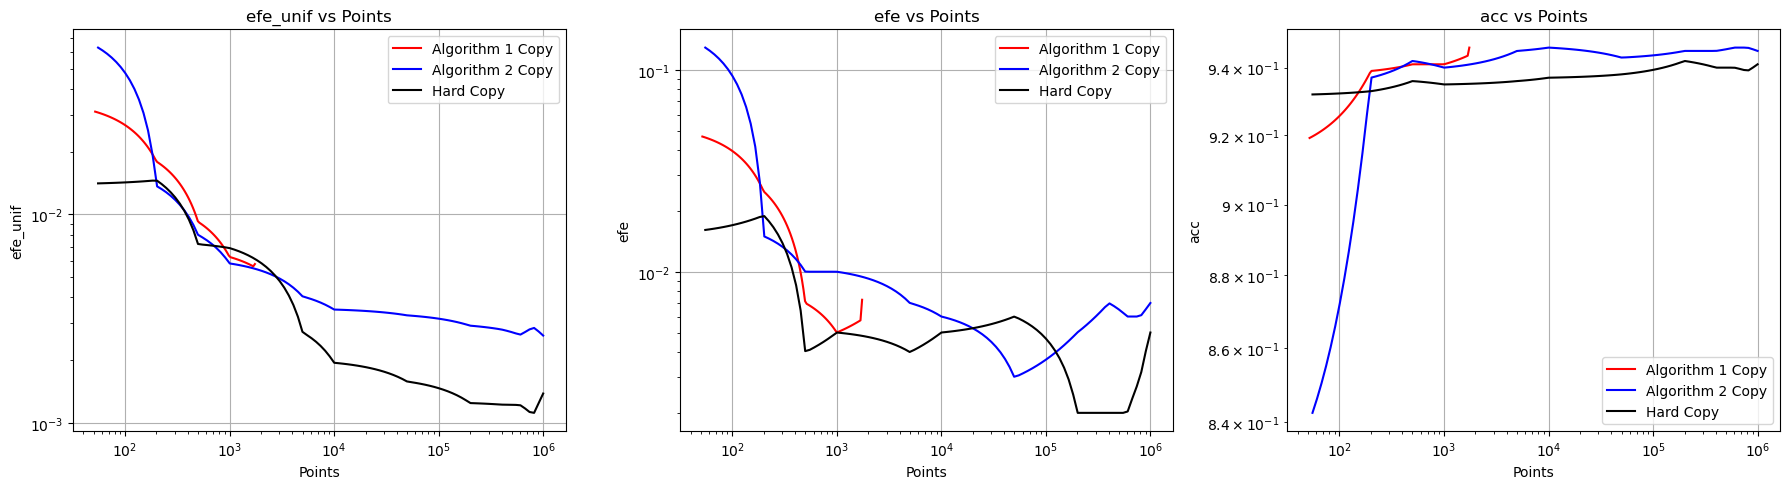

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9440   0.0058 0.0060   0.0049      0.0055        0.0005    1793.4000  41.8120
 Model 2 0.9450   0.0032 0.0070   0.0040      0.0026        0.0003 1000000.0000   0.0000
 Model 3 0.9410   0.0020 0.0050   0.0032      0.0014        0.0002 1000000.0000   0.0000
Blackbox 0.9400   0.0045                                                                


In [8]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS1_1_4_seed")
print(summary_df.to_string(index=False))

### Black box 2: Gradient Boosting classifier

In [9]:
# Load the data
with open("../results/results_DS1_2_4_seed42.pkl", "rb") as f:
    data_loaded = pickle.load(f)

# Extract and assign variables
for i in range(1, 4):
    globals()[f"model{i}"] = data_loaded[f"model{i}"]["model"]
    globals()[f"efe_{i}"] = data_loaded[f"model{i}"]["efe"]
    globals()[f"acc_{i}"] = data_loaded[f"model{i}"]["acc"]
    globals()[f"efe_unif_{i}"] = data_loaded[f"model{i}"]["efe_unif"]

# Extract and assign variables for blackbox model
bbmodel = data_loaded["blackb"]["model"]
accbb = data_loaded["blackb"]["acc"]

Results of the Black Box:
The accuracy over the test dataset is: 0.93


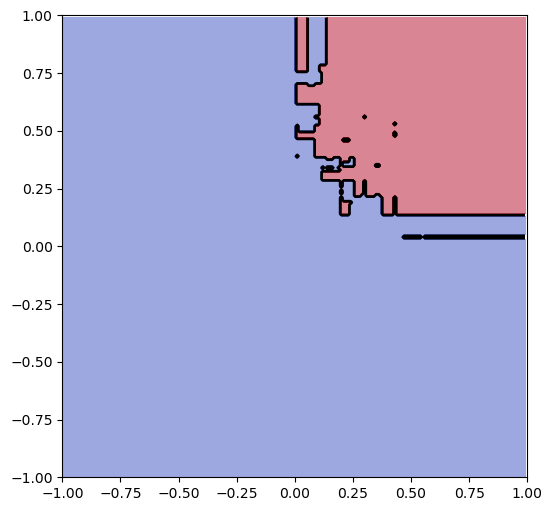

In [10]:
# bb: accuracy and plot (only seed 42)
print("Results of the Black Box:")
print("The accuracy over the test dataset is:", accbb)
plot_decision_boundary(bbmodelW)

Results of the Algorithm 1:
The empirical fidelity error over the test dataset is: 0.02
The accuracy over the test dataset is: 0.94
The empirical fidelity error over a big synthetic and uniform dataset is: 0.014211


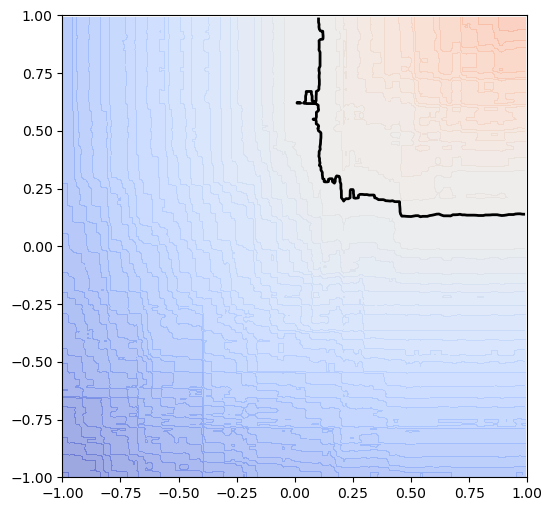

In [11]:
# model1: metrics and plot (only seed 42)
print("Results of the Algorithm 1:")
print("The empirical fidelity error over the test dataset is:", efe_1[-1])
print("The accuracy over the test dataset is:", acc_1[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_1[-1])

plot_decision_boundary(model1)

Results of the Algorithm 2:
The empirical fidelity error over the test dataset is: 0.005
The accuracy over the test dataset is: 0.935
The empirical fidelity error over a big synthetic and uniform dataset is: 0.006403


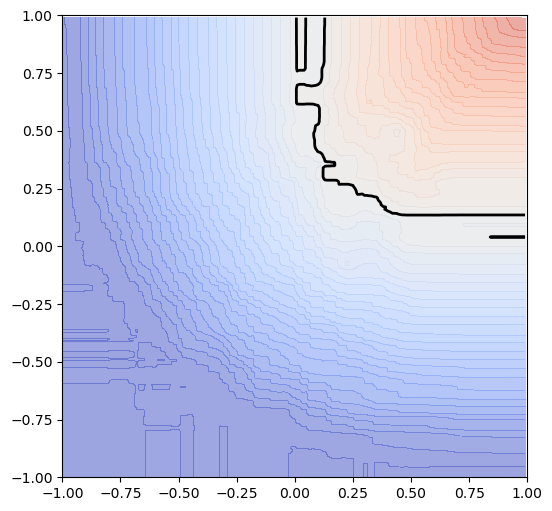

In [12]:
# model2: metrics and plot (only seed 42)
print("Results of the Algorithm 2:")
print("The empirical fidelity error over the test dataset is:", efe_2[-1])
print("The accuracy over the test dataset is:", acc_2[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_2[-1])

plot_decision_boundary(model2)

Results of the Algorithm 3:
The empirical fidelity error over the test dataset is: 0.005
The accuracy over the test dataset is: 0.935
The empirical fidelity error over a big synthetic and uniform dataset is: 0.002727


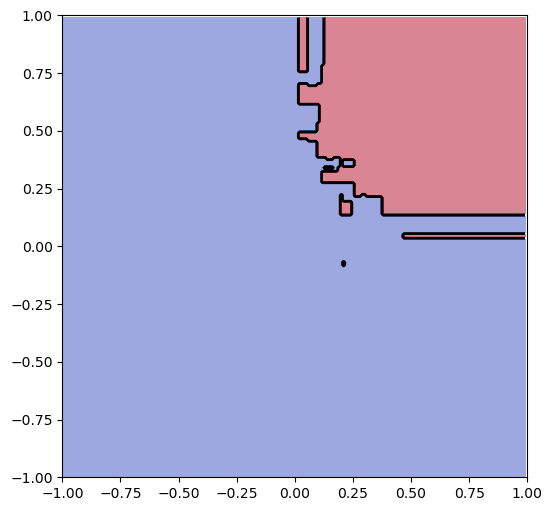

In [13]:
# model3: metrics and plot (only seed 42)
print("Results of the Algorithm 3:")
print("The empirical fidelity error over the test dataset is:", efe_3[-1])
print("The accuracy over the test dataset is:", acc_3[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_3[-1])

plot_decision_boundary(model3)

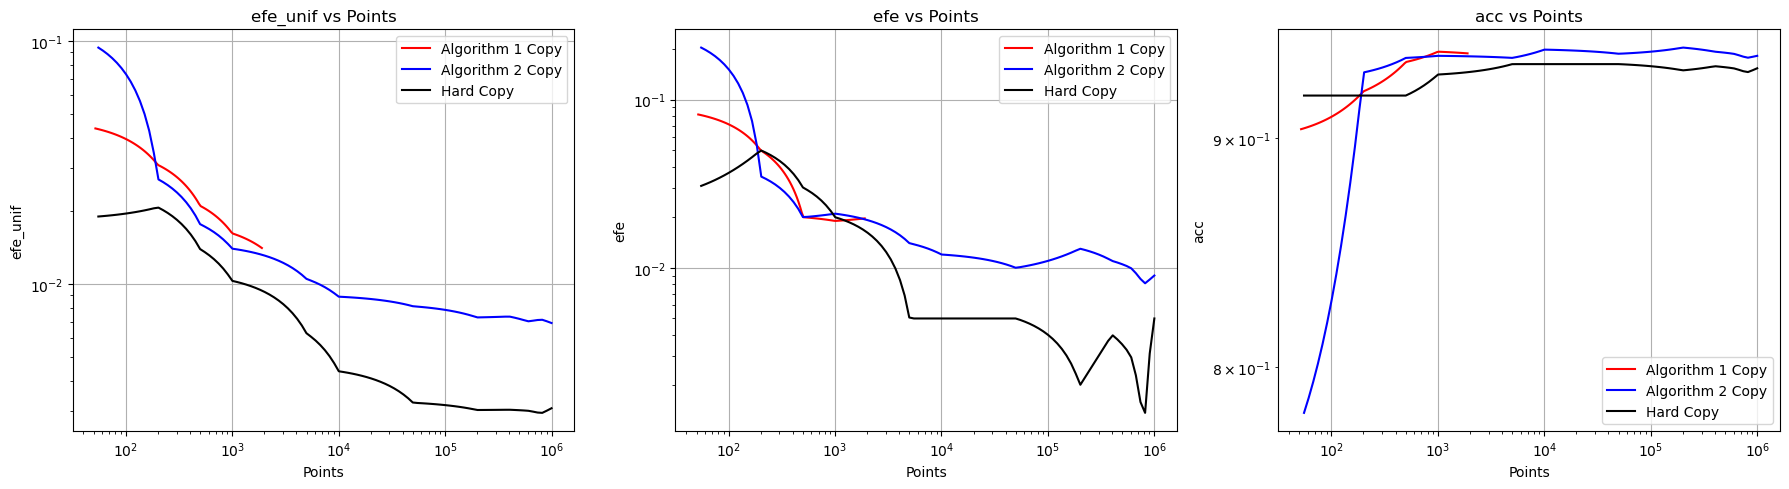

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9400   0.0032 0.0200   0.0032      0.0139        0.0004    1990.6000  56.2089
 Model 2 0.9390   0.0020 0.0090   0.0020      0.0069        0.0005 1000000.0000   0.0000
 Model 3 0.9330   0.0024 0.0050   0.0032      0.0031        0.0003 1000000.0000   0.0000
Blackbox 0.9300   0.0000                                                                


In [14]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS1_2_4_seed")
print(summary_df.to_string(index=False))

### Black box 3: Neural Network classifier

In [15]:
# Load the data
with open("../results/results_DS1_3_4_seed42.pkl", "rb") as f:
    data_loaded = pickle.load(f)

# Extract and assign variables
for i in range(1, 4):
    globals()[f"model{i}"] = data_loaded[f"model{i}"]["model"]
    globals()[f"efe_{i}"] = data_loaded[f"model{i}"]["efe"]
    globals()[f"acc_{i}"] = data_loaded[f"model{i}"]["acc"]
    globals()[f"efe_unif_{i}"] = data_loaded[f"model{i}"]["efe_unif"]

# Extract and assign variables for blackbox model
bbmodel = data_loaded["blackb"]["model"]
accbb = data_loaded["blackb"]["acc"]

Results of the Black Box:
The accuracy over the test dataset is: 0.94


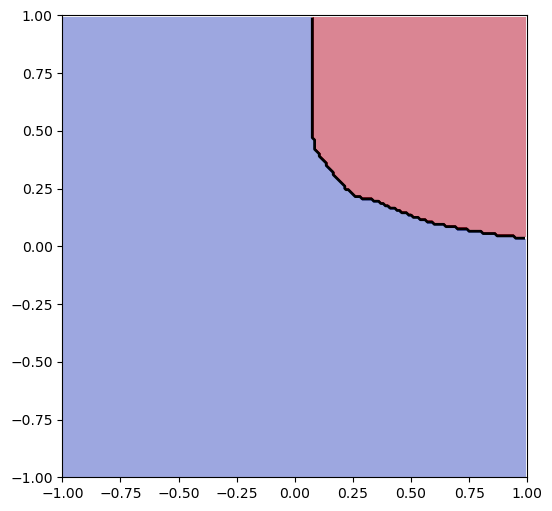

In [16]:
# bb: accuracy and plot (only seed 42)
print("Results of the Black Box:")
print("The accuracy over the test dataset is:", accbb)
plot_decision_boundary(bbmodelW)

Results of the Algorithm 1:
The empirical fidelity error over the test dataset is: 0.01
The accuracy over the test dataset is: 0.93
The empirical fidelity error over a big synthetic and uniform dataset is: 0.001826


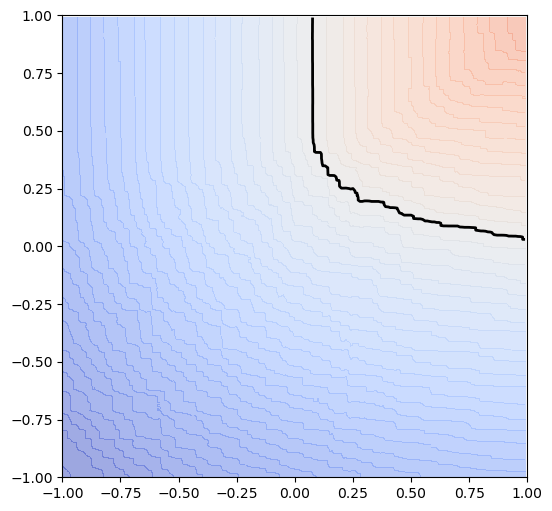

In [17]:
# model1: metrics and plot (only seed 42)
print("Results of the Algorithm 1:")
print("The empirical fidelity error over the test dataset is:", efe_1[-1])
print("The accuracy over the test dataset is:", acc_1[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_1[-1])

plot_decision_boundary(model1)

Results of the Algorithm 2:
The empirical fidelity error over the test dataset is: 0.0
The accuracy over the test dataset is: 0.94
The empirical fidelity error over a big synthetic and uniform dataset is: 0.001546


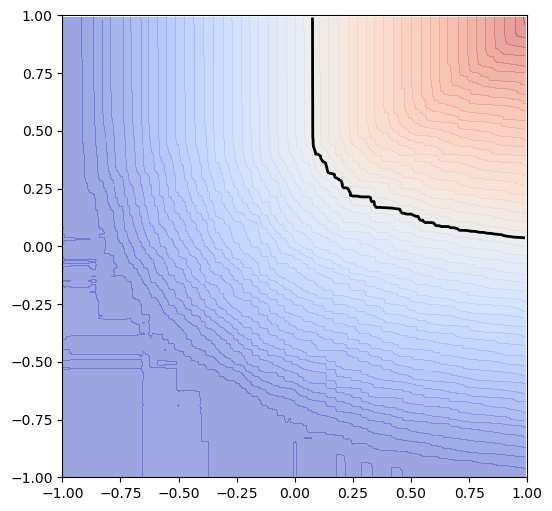

In [18]:
# model2: metrics and plot (only seed 42)
print("Results of the Algorithm 2:")
print("The empirical fidelity error over the test dataset is:", efe_2[-1])
print("The accuracy over the test dataset is:", acc_2[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_2[-1])

plot_decision_boundary(model2)

Results of the Algorithm 3:
The empirical fidelity error over the test dataset is: 0.0
The accuracy over the test dataset is: 0.94
The empirical fidelity error over a big synthetic and uniform dataset is: 0.000919


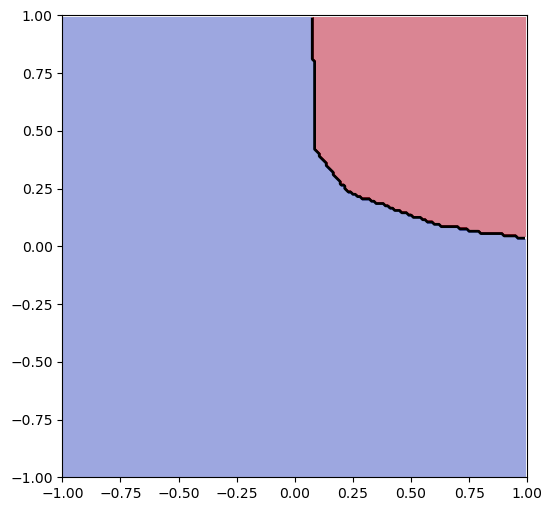

In [19]:
# model3: metrics and plot (only seed 42)
print("Results of the Algorithm 3:")
print("The empirical fidelity error over the test dataset is:", efe_3[-1])
print("The accuracy over the test dataset is:", acc_3[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_3[-1])

plot_decision_boundary(model3)

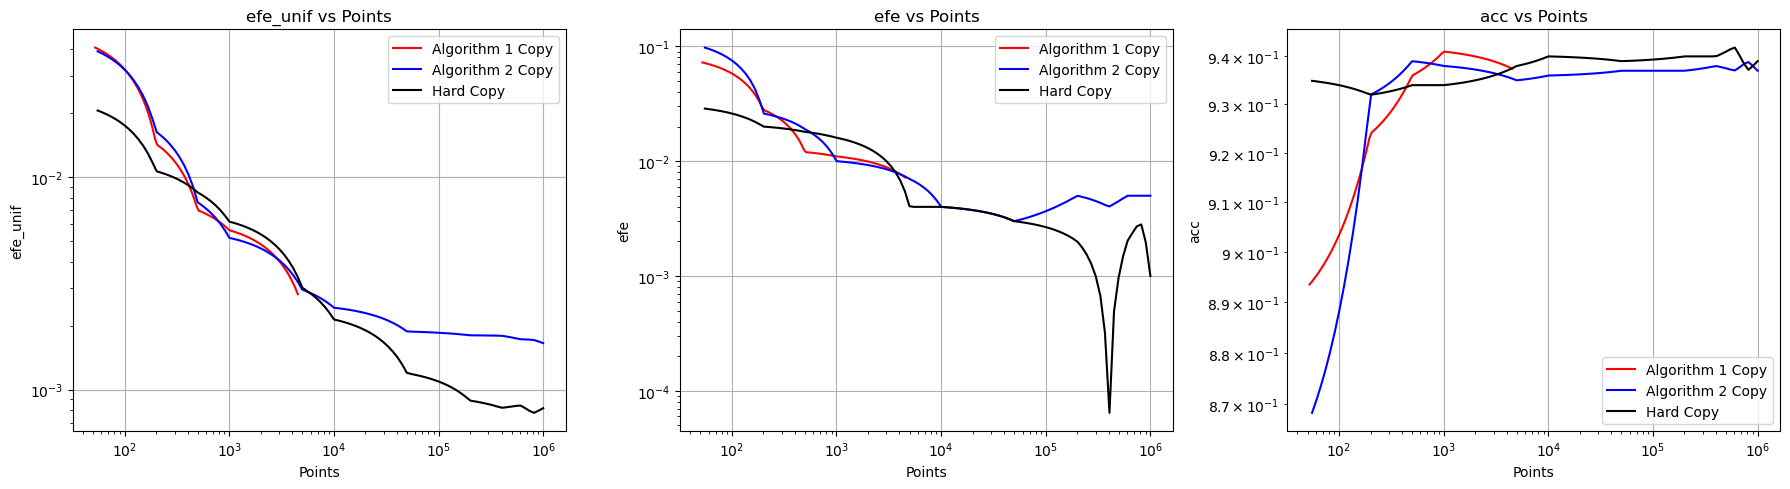

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9370   0.0040 0.0070   0.0075      0.0027        0.0005    4670.4000 111.2342
 Model 2 0.9370   0.0081 0.0050   0.0045      0.0017        0.0001 1000000.0000   0.0000
 Model 3 0.9390   0.0020 0.0010   0.0020      0.0008        0.0001 1000000.0000   0.0000
Blackbox 0.9400   0.0032                                                                


In [20]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS1_3_4_seed")
print(summary_df.to_string(index=False))

## Two spirals dataset

### Black box 1: Random Forest classifier

In [21]:
# Load the data
with open("../results/results_DS2_1_4_seed42.pkl", "rb") as f:
    data_loaded = pickle.load(f)

# Extract and assign variables
for i in range(1, 4):
    globals()[f"model{i}"] = data_loaded[f"model{i}"]["model"]
    globals()[f"efe_{i}"] = data_loaded[f"model{i}"]["efe"]
    globals()[f"acc_{i}"] = data_loaded[f"model{i}"]["acc"]
    globals()[f"efe_unif_{i}"] = data_loaded[f"model{i}"]["efe_unif"]

# Extract and assign variables for blackbox model
bbmodel = data_loaded["blackb"]["model"]
accbb = data_loaded["blackb"]["acc"]

Results of the Black Box:
The accuracy over the test dataset is: 0.99


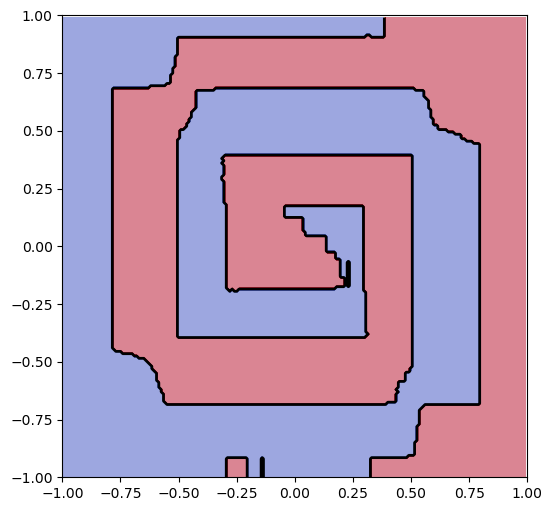

In [22]:
# bb: accuracy and plot (only seed 42)
print("Results of the Black Box:")
print("The accuracy over the test dataset is:", accbb)
plot_decision_boundary(bbmodelW)

Results of the Algorithm 1:
The empirical fidelity error over the test dataset is: 0.018
The accuracy over the test dataset is: 0.972
The empirical fidelity error over a big synthetic and uniform dataset is: 0.034011


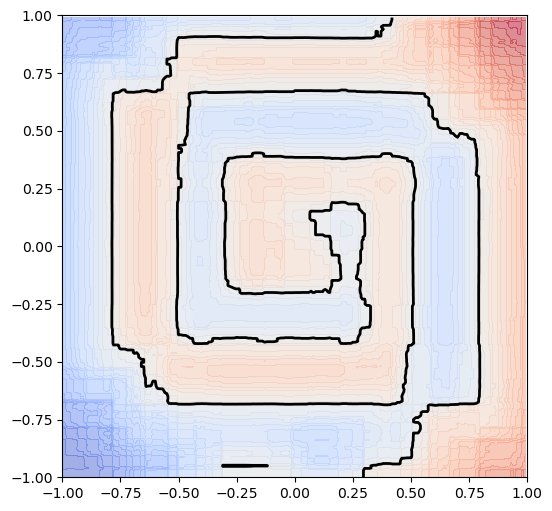

In [23]:
# model1: metrics and plot (only seed 42)
print("Results of the Algorithm 1:")
print("The empirical fidelity error over the test dataset is:", efe_1[-1])
print("The accuracy over the test dataset is:", acc_1[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_1[-1])

plot_decision_boundary(model1)

Results of the Algorithm 2:
The empirical fidelity error over the test dataset is: 0.0045
The accuracy over the test dataset is: 0.9905
The empirical fidelity error over a big synthetic and uniform dataset is: 0.014478


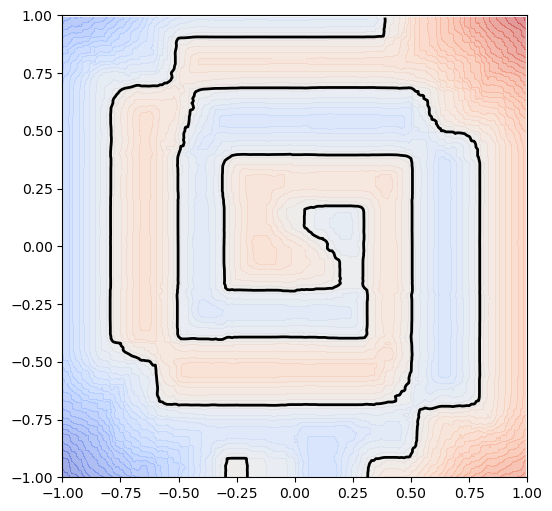

In [24]:
# model2: metrics and plot (only seed 42)
print("Results of the Algorithm 2:")
print("The empirical fidelity error over the test dataset is:", efe_2[-1])
print("The accuracy over the test dataset is:", acc_2[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_2[-1])

plot_decision_boundary(model2)

Results of the Algorithm 3:
The empirical fidelity error over the test dataset is: 0.0005
The accuracy over the test dataset is: 0.9895
The empirical fidelity error over a big synthetic and uniform dataset is: 0.007134


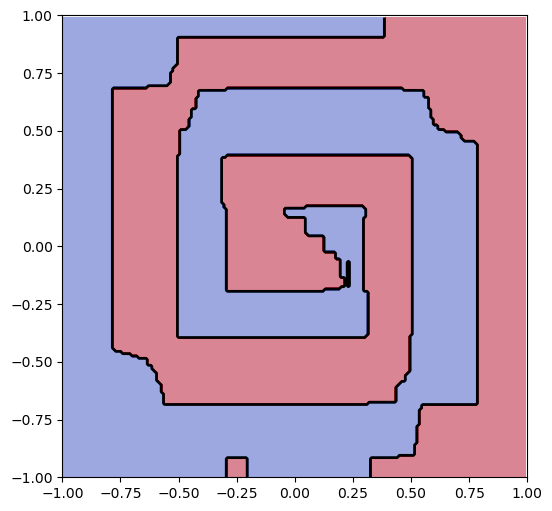

In [25]:
# model3: metrics and plot (only seed 42)
print("Results of the Algorithm 3:")
print("The empirical fidelity error over the test dataset is:", efe_3[-1])
print("The accuracy over the test dataset is:", acc_3[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_3[-1])

plot_decision_boundary(model3)

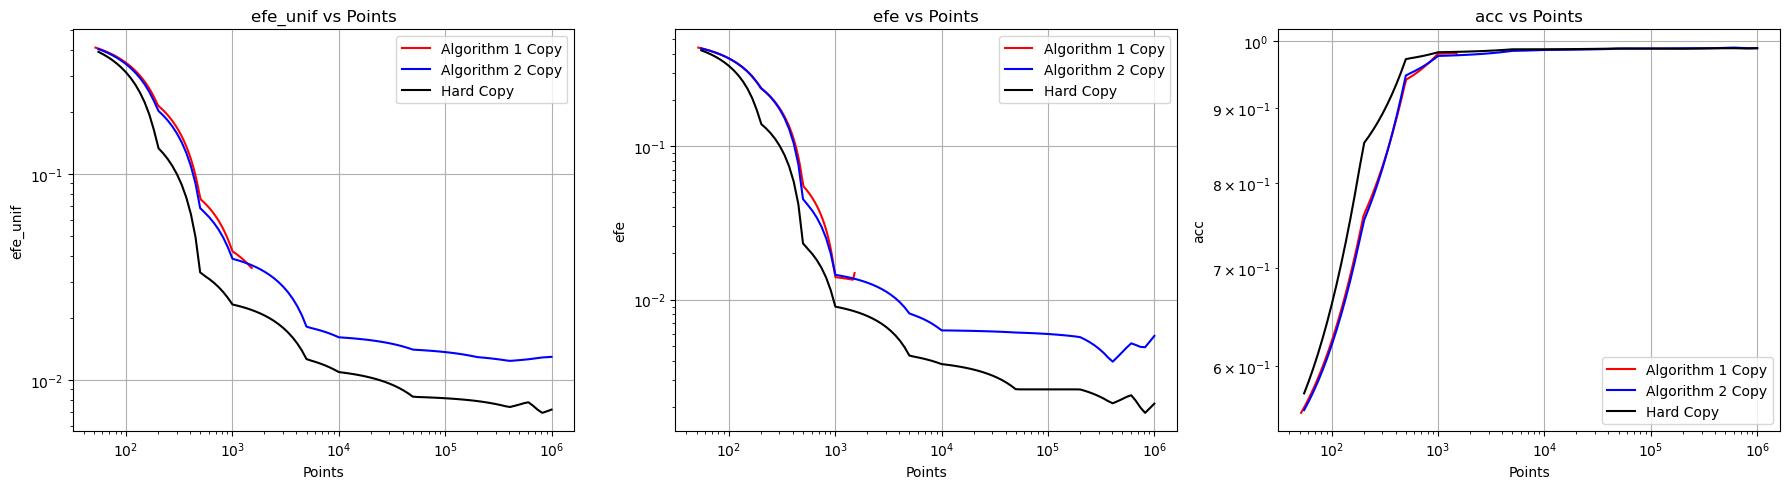

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9809   0.0073 0.0135   0.0038      0.0337        0.0037    1597.4000  60.2382
 Model 2 0.9890   0.0041 0.0058   0.0009      0.0130        0.0012 1000000.0000   0.0000
 Model 3 0.9887   0.0038 0.0021   0.0010      0.0072        0.0011 1000000.0000   0.0000
Blackbox 0.9894   0.0036                                                                


In [26]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS2_1_4_seed")
print(summary_df.to_string(index=False))

### Black box 2: Gradient Boosting classifier

In [27]:
# Load the data
with open("../results/results_DS2_2_4_seed42.pkl", "rb") as f:
    data_loaded = pickle.load(f)

# Extract and assign variables
for i in range(1, 4):
    globals()[f"model{i}"] = data_loaded[f"model{i}"]["model"]
    globals()[f"efe_{i}"] = data_loaded[f"model{i}"]["efe"]
    globals()[f"acc_{i}"] = data_loaded[f"model{i}"]["acc"]
    globals()[f"efe_unif_{i}"] = data_loaded[f"model{i}"]["efe_unif"]

# Extract and assign variables for blackbox model
bbmodel = data_loaded["blackb"]["model"]
accbb = data_loaded["blackb"]["acc"]

Results of the Black Box:
The accuracy over the test dataset is: 0.9965


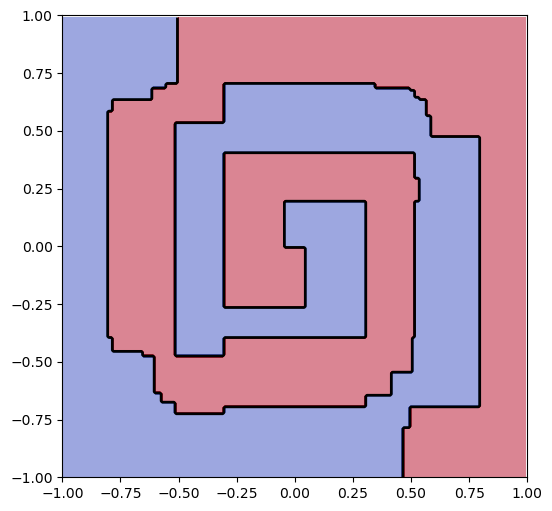

In [28]:
# bb: accuracy and plot (only seed 42)
print("Results of the Black Box:")
print("The accuracy over the test dataset is:", accbb)
plot_decision_boundary(bbmodelW)

Results of the Algorithm 1:
The empirical fidelity error over the test dataset is: 0.01
The accuracy over the test dataset is: 0.9925
The empirical fidelity error over a big synthetic and uniform dataset is: 0.032915


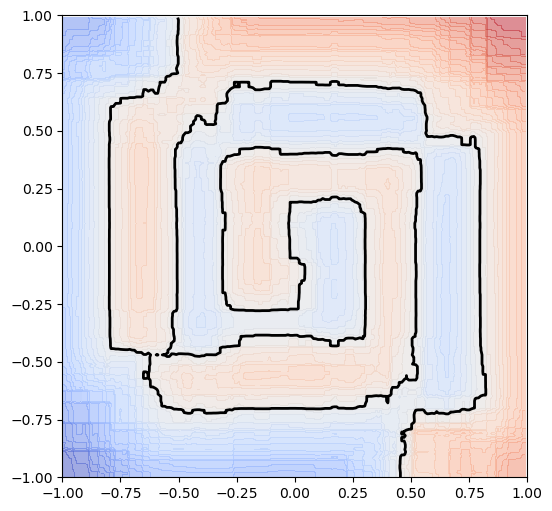

In [29]:
# model1: metrics and plot (only seed 42)
print("Results of the Algorithm 1:")
print("The empirical fidelity error over the test dataset is:", efe_1[-1])
print("The accuracy over the test dataset is:", acc_1[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_1[-1])

plot_decision_boundary(model1)

Results of the Algorithm 2:
The empirical fidelity error over the test dataset is: 0.003
The accuracy over the test dataset is: 0.9995
The empirical fidelity error over a big synthetic and uniform dataset is: 0.011693


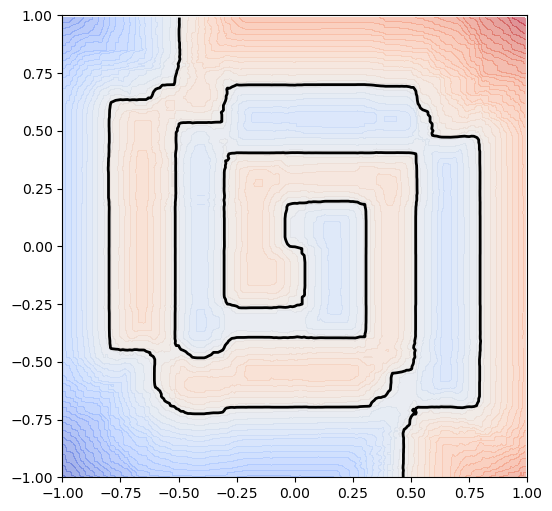

In [30]:
# model2: metrics and plot (only seed 42)
print("Results of the Algorithm 2:")
print("The empirical fidelity error over the test dataset is:", efe_2[-1])
print("The accuracy over the test dataset is:", acc_2[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_2[-1])

plot_decision_boundary(model2)

Results of the Algorithm 3:
The empirical fidelity error over the test dataset is: 0.0015
The accuracy over the test dataset is: 0.997
The empirical fidelity error over a big synthetic and uniform dataset is: 0.006126


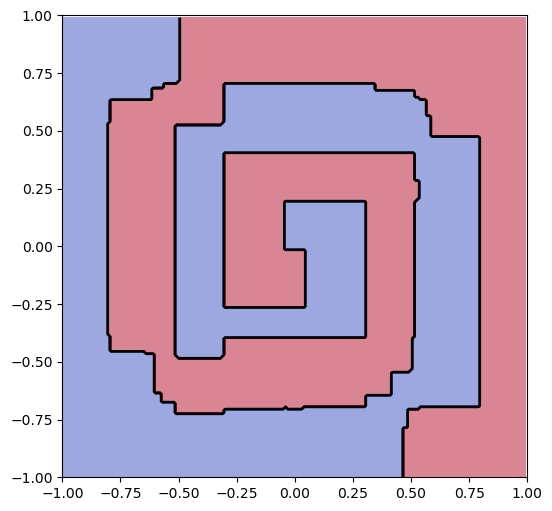

In [31]:
# model3: metrics and plot (only seed 42)
print("Results of the Algorithm 3:")
print("The empirical fidelity error over the test dataset is:", efe_3[-1])
print("The accuracy over the test dataset is:", acc_3[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_3[-1])

plot_decision_boundary(model3)

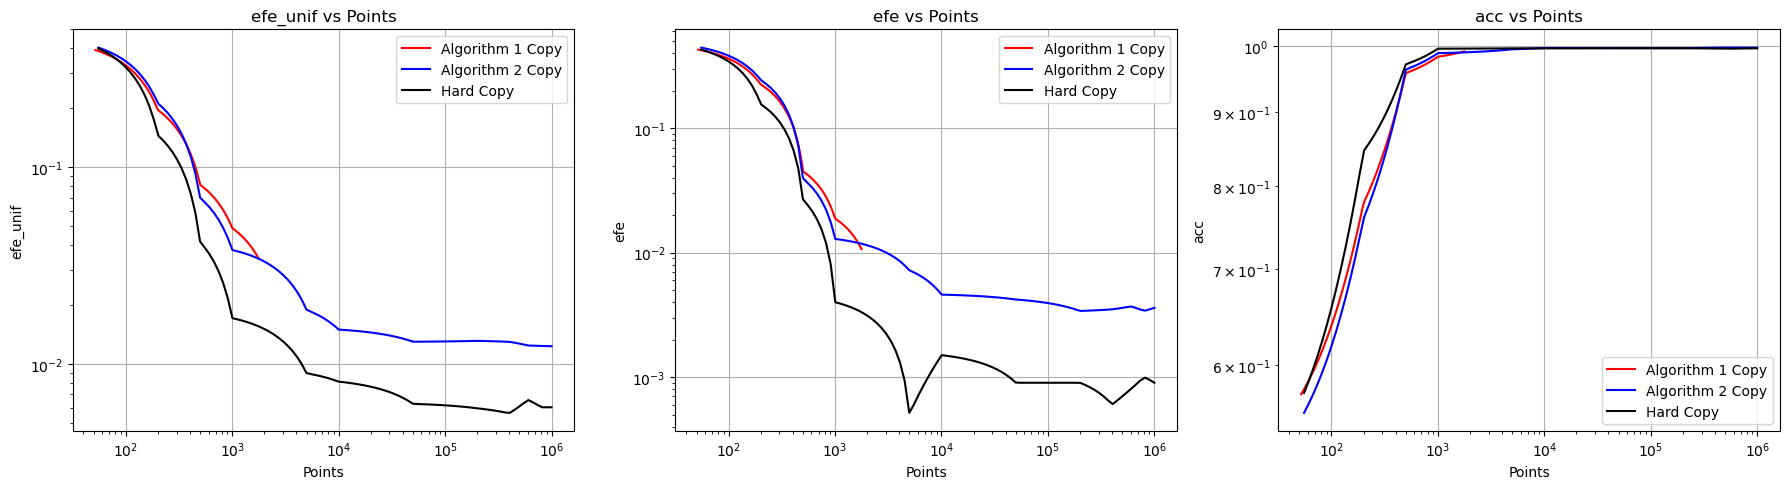

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9933   0.0009 0.0094   0.0010      0.0325        0.0020    1858.6000  67.9959
 Model 2 0.9981   0.0007 0.0036   0.0010      0.0123        0.0005 1000000.0000   0.0000
 Model 3 0.9970   0.0005 0.0009   0.0004      0.0060        0.0005 1000000.0000   0.0000
Blackbox 0.9965   0.0000                                                                


In [32]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS2_2_4_seed")
print(summary_df.to_string(index=False))

### Black box 3: Neural Network classifier

In [33]:
# Load the data
with open("../results/results_DS2_3_4_seed42.pkl", "rb") as f:
    data_loaded = pickle.load(f)

# Extract and assign variables
for i in range(1, 4):
    globals()[f"model{i}"] = data_loaded[f"model{i}"]["model"]
    globals()[f"efe_{i}"] = data_loaded[f"model{i}"]["efe"]
    globals()[f"acc_{i}"] = data_loaded[f"model{i}"]["acc"]
    globals()[f"efe_unif_{i}"] = data_loaded[f"model{i}"]["efe_unif"]

# Extract and assign variables for blackbox model
bbmodel = data_loaded["blackb"]["model"]
accbb = data_loaded["blackb"]["acc"]

Results of the Black Box:
The accuracy over the test dataset is: 1.0


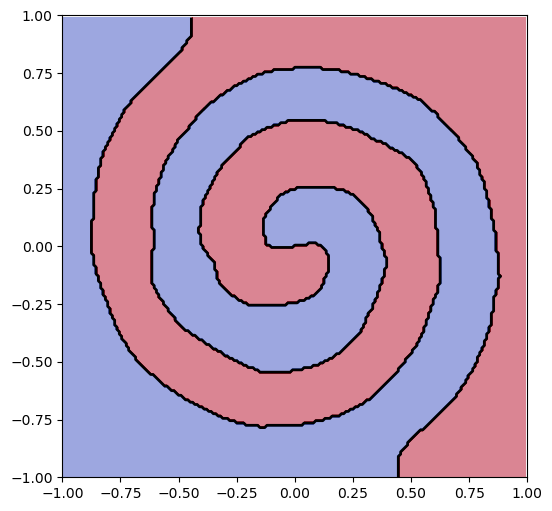

In [34]:
# bb: accuracy and plot (only seed 42)
print("Results of the Black Box:")
print("The accuracy over the test dataset is:", accbb)
plot_decision_boundary(bbmodelW)

Results of the Algorithm 1:
The empirical fidelity error over the test dataset is: 0.001
The accuracy over the test dataset is: 0.999
The empirical fidelity error over a big synthetic and uniform dataset is: 0.032599


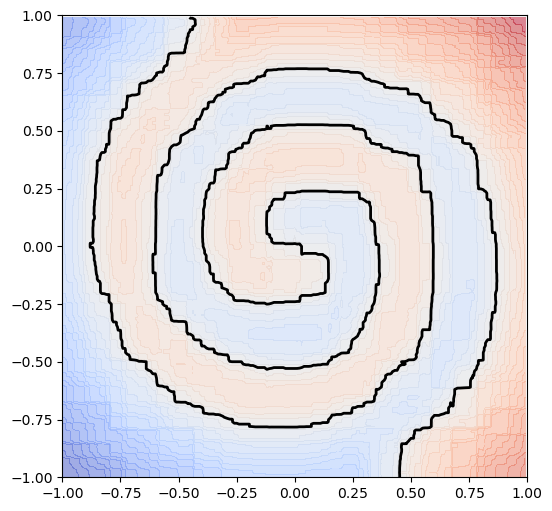

In [35]:
# model1: metrics and plot (only seed 42)
print("Results of the Algorithm 1:")
print("The empirical fidelity error over the test dataset is:", efe_1[-1])
print("The accuracy over the test dataset is:", acc_1[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_1[-1])

plot_decision_boundary(model1)

Results of the Algorithm 2:
The empirical fidelity error over the test dataset is: 0.0
The accuracy over the test dataset is: 1.0
The empirical fidelity error over a big synthetic and uniform dataset is: 0.020451


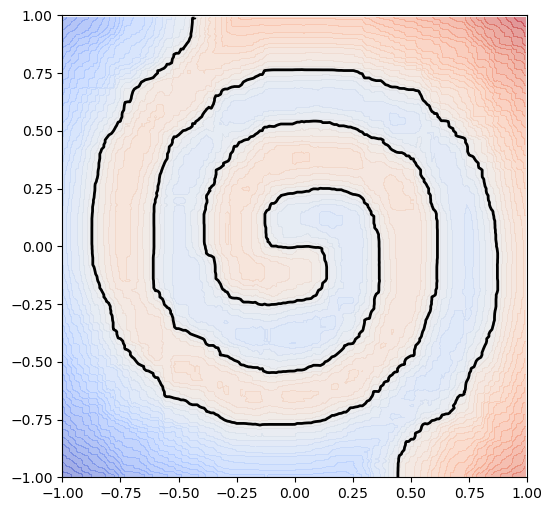

In [36]:
# model2: metrics and plot (only seed 42)
print("Results of the Algorithm 2:")
print("The empirical fidelity error over the test dataset is:", efe_2[-1])
print("The accuracy over the test dataset is:", acc_2[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_2[-1])

plot_decision_boundary(model2)

Results of the Algorithm 3:
The empirical fidelity error over the test dataset is: 0.0
The accuracy over the test dataset is: 1.0
The empirical fidelity error over a big synthetic and uniform dataset is: 0.012517


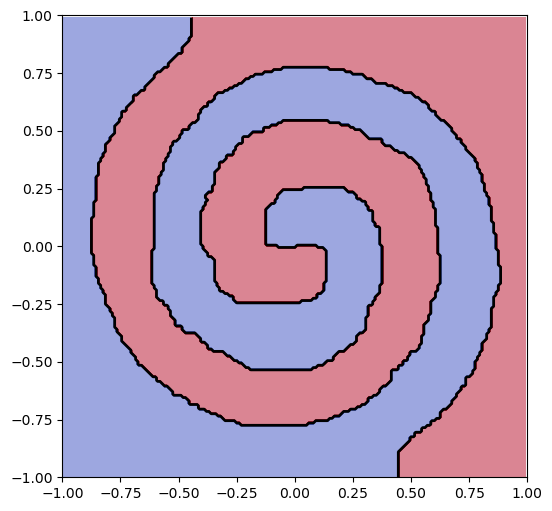

In [37]:
# model3: metrics and plot (only seed 42)
print("Results of the Algorithm 3:")
print("The empirical fidelity error over the test dataset is:", efe_3[-1])
print("The accuracy over the test dataset is:", acc_3[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_3[-1])

plot_decision_boundary(model3)

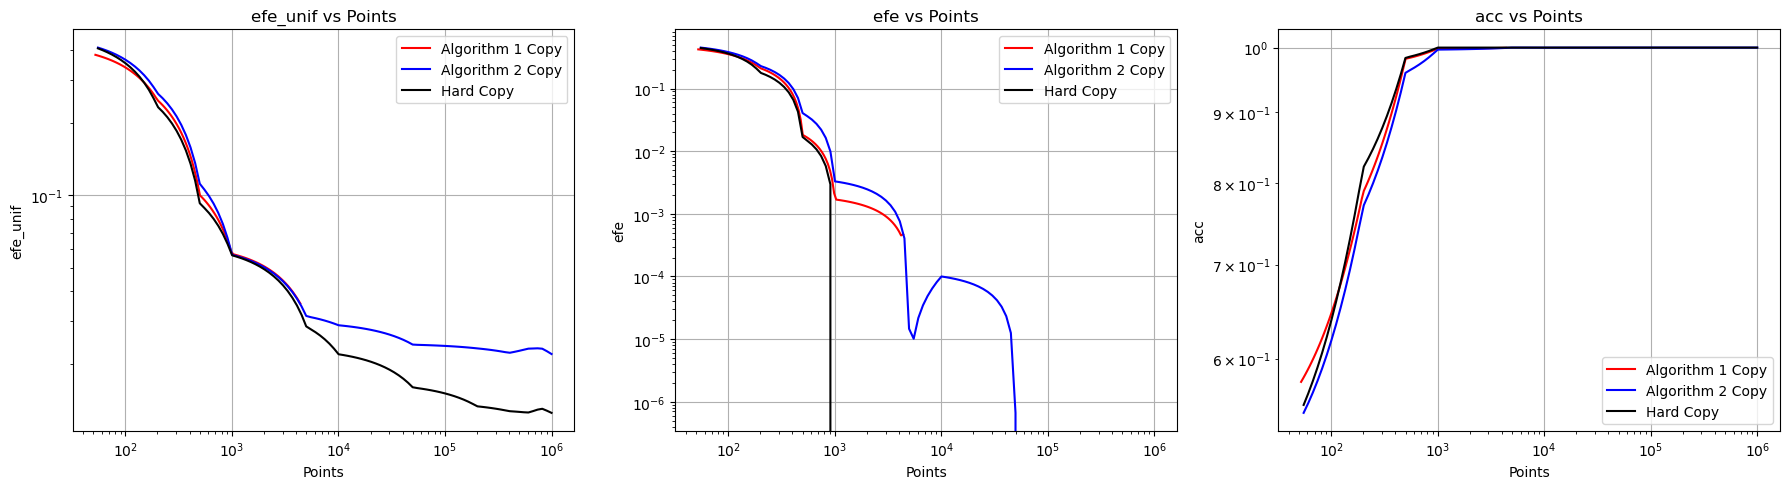

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.9997   0.0004 0.0003   0.0004      0.0340        0.0021    4596.6000 189.9869
 Model 2 1.0000   0.0000 0.0000   0.0000      0.0219        0.0010 1000000.0000   0.0000
 Model 3 1.0000   0.0000 0.0000   0.0000      0.0125        0.0006 1000000.0000   0.0000
Blackbox 1.0000   0.0000                                                                


In [38]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS2_3_4_seed")
print(summary_df.to_string(index=False))

## Space-filling and convoluted dataset

### Black box 1: Random Forest classifier

In [39]:
# Load the data
with open("../results/results_DS3_1_4_seed42.pkl", "rb") as f:
    data_loaded = pickle.load(f)

# Extract and assign variables
for i in range(1, 4):
    globals()[f"model{i}"] = data_loaded[f"model{i}"]["model"]
    globals()[f"efe_{i}"] = data_loaded[f"model{i}"]["efe"]
    globals()[f"acc_{i}"] = data_loaded[f"model{i}"]["acc"]
    globals()[f"efe_unif_{i}"] = data_loaded[f"model{i}"]["efe_unif"]

# Extract and assign variables for blackbox model
bbmodel = data_loaded["blackb"]["model"]
accbb = data_loaded["blackb"]["acc"]

Results of the Black Box:
The accuracy over the test dataset is: 0.871


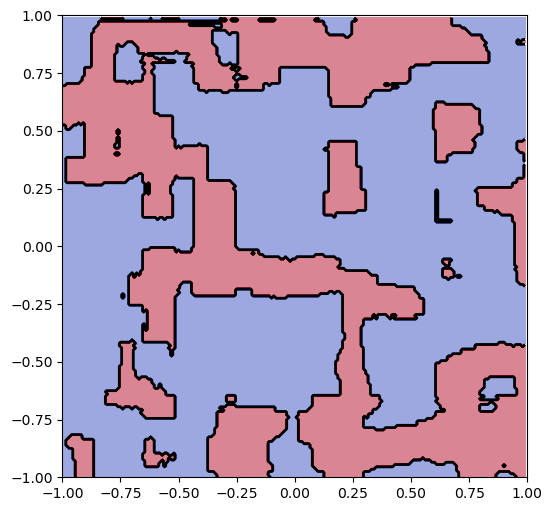

In [40]:
# bb: accuracy and plot (only seed 42)
print("Results of the Black Box:")
print("The accuracy over the test dataset is:", accbb)
plot_decision_boundary(bbmodelW)

Results of the Algorithm 1:
The empirical fidelity error over the test dataset is: 0.112
The accuracy over the test dataset is: 0.797
The empirical fidelity error over a big synthetic and uniform dataset is: 0.11455


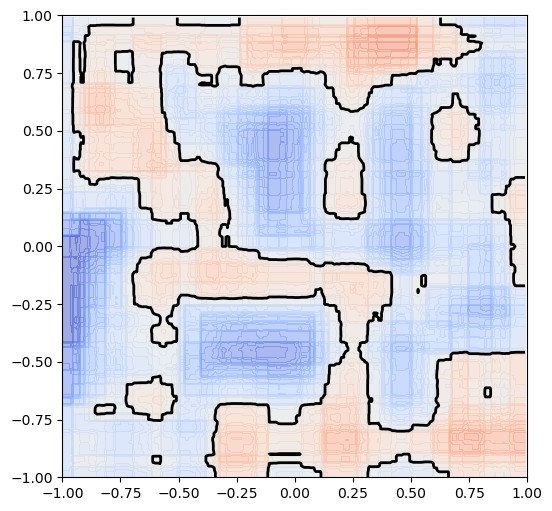

In [41]:
# model1: metrics and plot (only seed 42)
print("Results of the Algorithm 1:")
print("The empirical fidelity error over the test dataset is:", efe_1[-1])
print("The accuracy over the test dataset is:", acc_1[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_1[-1])

plot_decision_boundary(model1)

Results of the Algorithm 2:
The empirical fidelity error over the test dataset is: 0.05
The accuracy over the test dataset is: 0.841
The empirical fidelity error over a big synthetic and uniform dataset is: 0.053965


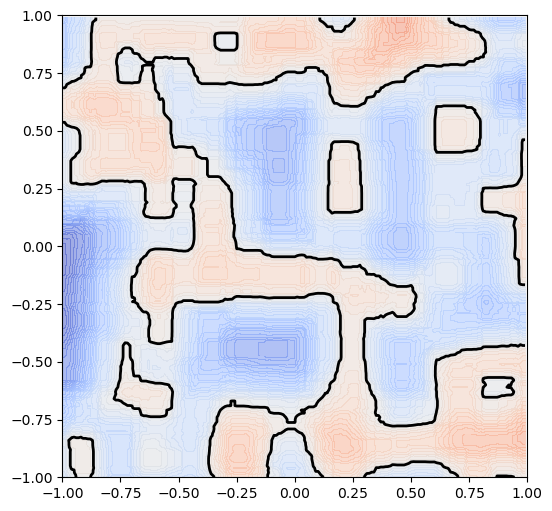

In [42]:
# model2: metrics and plot (only seed 42)
print("Results of the Algorithm 2:")
print("The empirical fidelity error over the test dataset is:", efe_2[-1])
print("The accuracy over the test dataset is:", acc_2[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_2[-1])

plot_decision_boundary(model2)

Results of the Algorithm 3:
The empirical fidelity error over the test dataset is: 0.0315
The accuracy over the test dataset is: 0.8535
The empirical fidelity error over a big synthetic and uniform dataset is: 0.028051


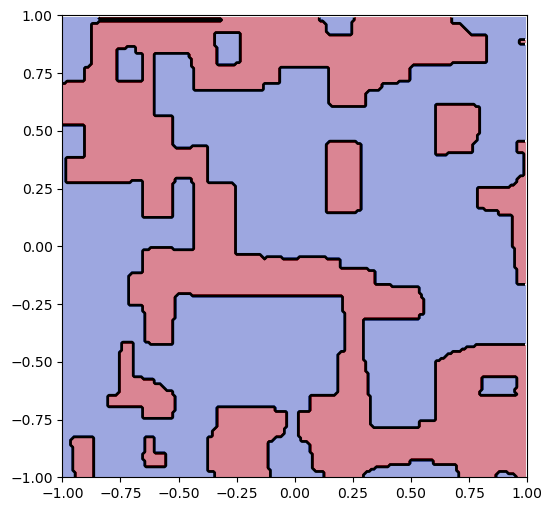

In [43]:
# model3: metrics and plot (only seed 42)
print("Results of the Algorithm 3:")
print("The empirical fidelity error over the test dataset is:", efe_3[-1])
print("The accuracy over the test dataset is:", acc_3[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_3[-1])

plot_decision_boundary(model3)

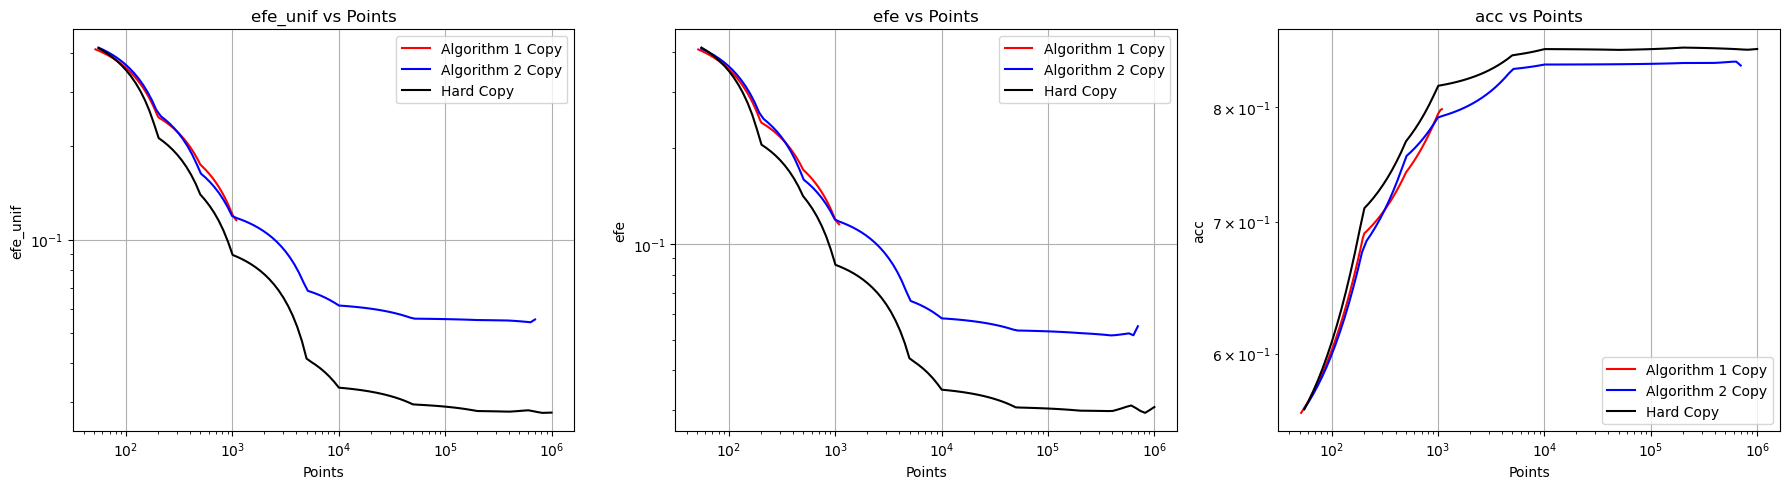

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m.   pts std.
 Model 1 0.8014   0.0043 0.1133   0.0007      0.1127        0.0040    1129.6000    41.7880
 Model 2 0.8437   0.0033 0.0500   0.0052      0.0540        0.0014  710620.0000 19736.1622
 Model 3 0.8562   0.0040 0.0307   0.0028      0.0277        0.0005 1000000.0000     0.0000
Blackbox 0.8717   0.0025                                                                  


In [44]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS3_1_4_seed")
print(summary_df.to_string(index=False))

### Black box 2: Gradient Boosting classifier

In [45]:
# Load the data
with open("../results/results_DS3_2_4_seed42.pkl", "rb") as f:
    data_loaded = pickle.load(f)

# Extract and assign variables
for i in range(1, 4):
    globals()[f"model{i}"] = data_loaded[f"model{i}"]["model"]
    globals()[f"efe_{i}"] = data_loaded[f"model{i}"]["efe"]
    globals()[f"acc_{i}"] = data_loaded[f"model{i}"]["acc"]
    globals()[f"efe_unif_{i}"] = data_loaded[f"model{i}"]["efe_unif"]

# Extract and assign variables for blackbox model
bbmodel = data_loaded["blackb"]["model"]
accbb = data_loaded["blackb"]["acc"]

Results of the Black Box:
The accuracy over the test dataset is: 0.895


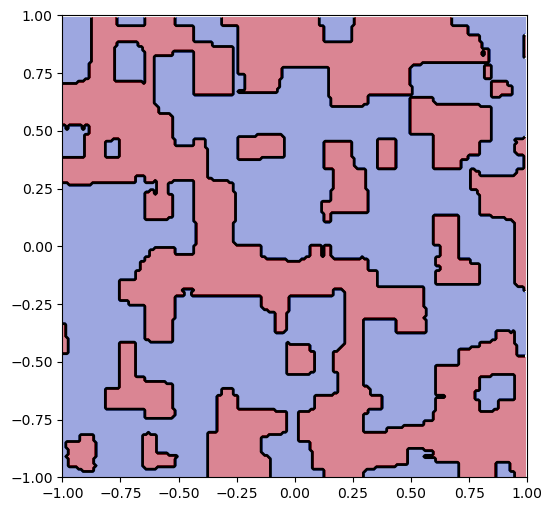

In [46]:
# bb: accuracy and plot (only seed 42)
print("Results of the Black Box:")
print("The accuracy over the test dataset is:", accbb)
plot_decision_boundary(bbmodelW)

Results of the Algorithm 1:
The empirical fidelity error over the test dataset is: 0.1175
The accuracy over the test dataset is: 0.8215
The empirical fidelity error over a big synthetic and uniform dataset is: 0.124374


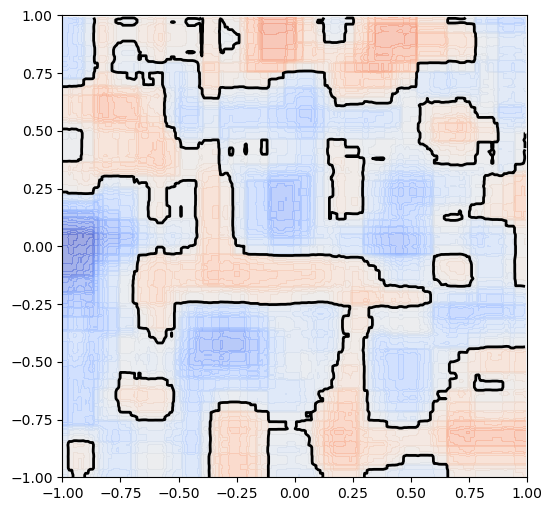

In [47]:
# model1: metrics and plot (only seed 42)
print("Results of the Algorithm 1:")
print("The empirical fidelity error over the test dataset is:", efe_1[-1])
print("The accuracy over the test dataset is:", acc_1[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_1[-1])

plot_decision_boundary(model1)

Results of the Algorithm 2:
The empirical fidelity error over the test dataset is: 0.066
The accuracy over the test dataset is: 0.859
The empirical fidelity error over a big synthetic and uniform dataset is: 0.070302


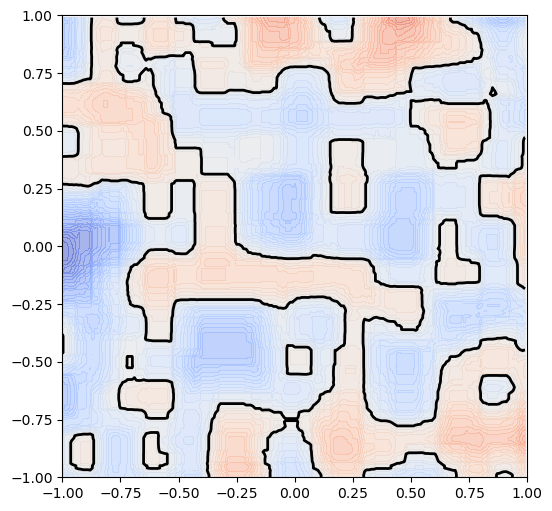

In [48]:
# model2: metrics and plot (only seed 42)
print("Results of the Algorithm 2:")
print("The empirical fidelity error over the test dataset is:", efe_2[-1])
print("The accuracy over the test dataset is:", acc_2[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_2[-1])

plot_decision_boundary(model2)

Results of the Algorithm 3:
The empirical fidelity error over the test dataset is: 0.022
The accuracy over the test dataset is: 0.881
The empirical fidelity error over a big synthetic and uniform dataset is: 0.031087


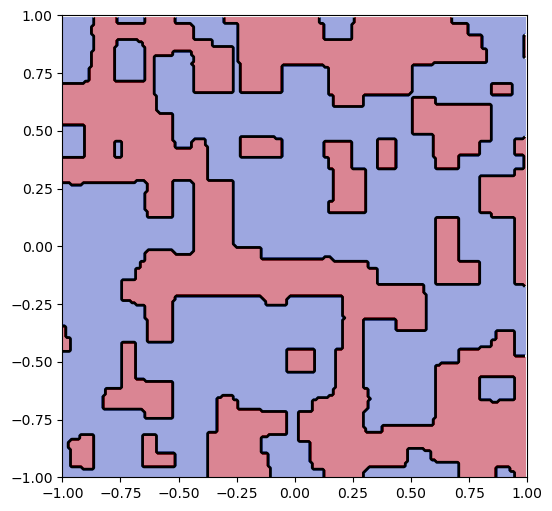

In [49]:
# model3: metrics and plot (only seed 42)
print("Results of the Algorithm 3:")
print("The empirical fidelity error over the test dataset is:", efe_3[-1])
print("The accuracy over the test dataset is:", acc_3[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_3[-1])

plot_decision_boundary(model3)

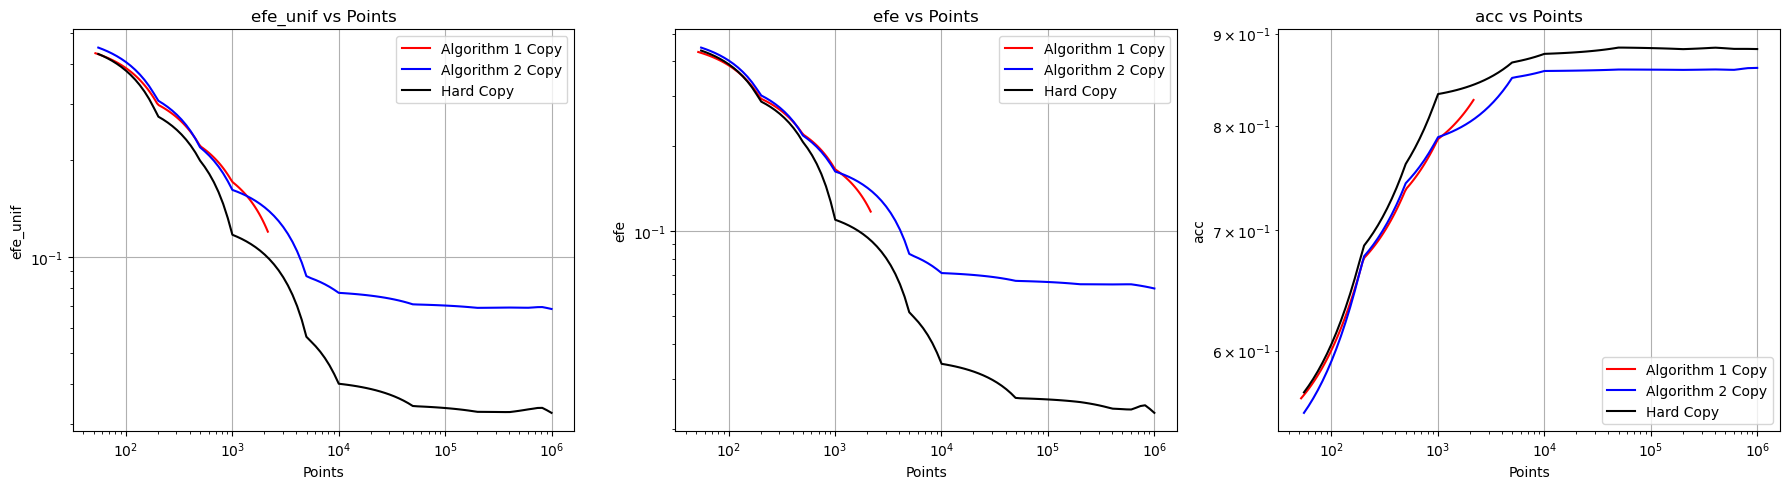

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.8289   0.0043 0.1147   0.0047      0.1165        0.0047    2241.2000  85.1761
 Model 2 0.8614   0.0021 0.0628   0.0023      0.0687        0.0027 1000000.0000   0.0000
 Model 3 0.8824   0.0028 0.0228   0.0027      0.0325        0.0020 1000000.0000   0.0000
Blackbox 0.8950   0.0000                                                                


In [50]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS3_2_4_seed")
print(summary_df.to_string(index=False))

### Black box 3: Neural Network classifier

In [51]:
# Load the data
with open("../results/results_DS3_3_4_seed42.pkl", "rb") as f:
    data_loaded = pickle.load(f)

# Extract and assign variables
for i in range(1, 4):
    globals()[f"model{i}"] = data_loaded[f"model{i}"]["model"]
    globals()[f"efe_{i}"] = data_loaded[f"model{i}"]["efe"]
    globals()[f"acc_{i}"] = data_loaded[f"model{i}"]["acc"]
    globals()[f"efe_unif_{i}"] = data_loaded[f"model{i}"]["efe_unif"]

# Extract and assign variables for blackbox model
bbmodel = data_loaded["blackb"]["model"]
accbb = data_loaded["blackb"]["acc"]

Results of the Black Box:
The accuracy over the test dataset is: 0.8435


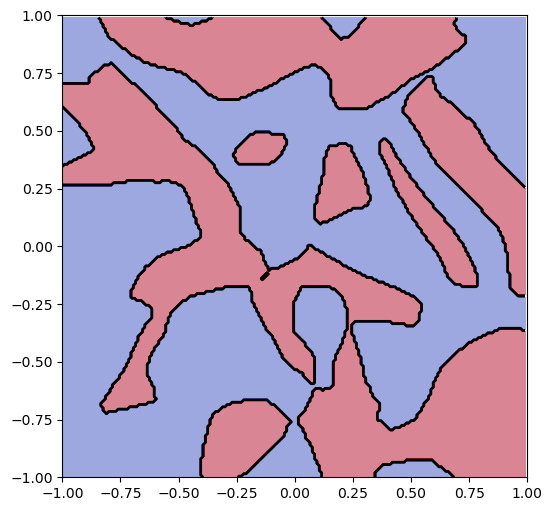

In [52]:
# bb: accuracy and plot (only seed 42)
print("Results of the Black Box:")
print("The accuracy over the test dataset is:", accbb)
plot_decision_boundary(bbmodelW)

Results of the Algorithm 1:
The empirical fidelity error over the test dataset is: 0.0595
The accuracy over the test dataset is: 0.825
The empirical fidelity error over a big synthetic and uniform dataset is: 0.071335


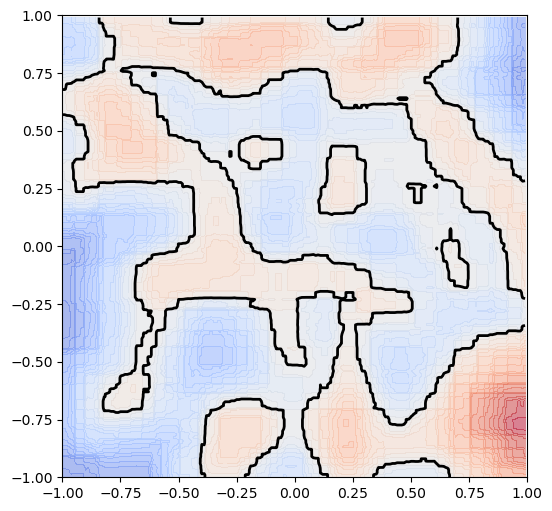

In [53]:
# model1: metrics and plot (only seed 42)
print("Results of the Algorithm 1:")
print("The empirical fidelity error over the test dataset is:", efe_1[-1])
print("The accuracy over the test dataset is:", acc_1[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_1[-1])

plot_decision_boundary(model1)

Results of the Algorithm 2:
The empirical fidelity error over the test dataset is: 0.051
The accuracy over the test dataset is: 0.8245
The empirical fidelity error over a big synthetic and uniform dataset is: 0.064218


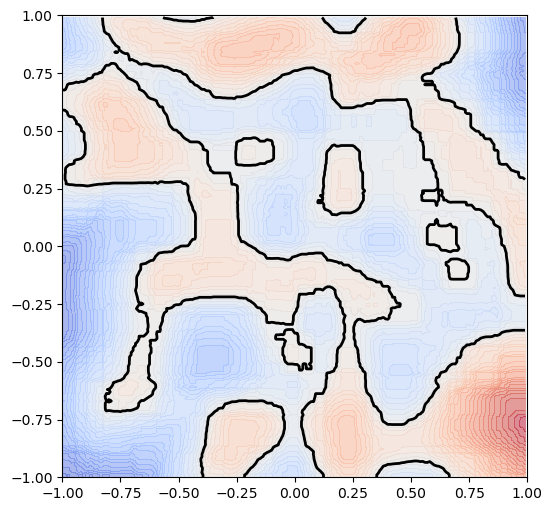

In [54]:
# model2: metrics and plot (only seed 42)
print("Results of the Algorithm 2:")
print("The empirical fidelity error over the test dataset is:", efe_2[-1])
print("The accuracy over the test dataset is:", acc_2[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_2[-1])

plot_decision_boundary(model2)

Results of the Algorithm 3:
The empirical fidelity error over the test dataset is: 0.026
The accuracy over the test dataset is: 0.8385
The empirical fidelity error over a big synthetic and uniform dataset is: 0.037176


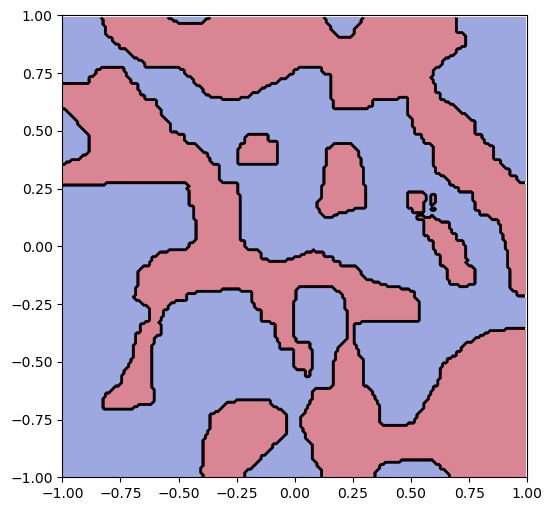

In [55]:
# model3: metrics and plot (only seed 42)
print("Results of the Algorithm 3:")
print("The empirical fidelity error over the test dataset is:", efe_3[-1])
print("The accuracy over the test dataset is:", acc_3[-1])
print("The empirical fidelity error over a big synthetic and uniform dataset is:", efe_unif_3[-1])

plot_decision_boundary(model3)

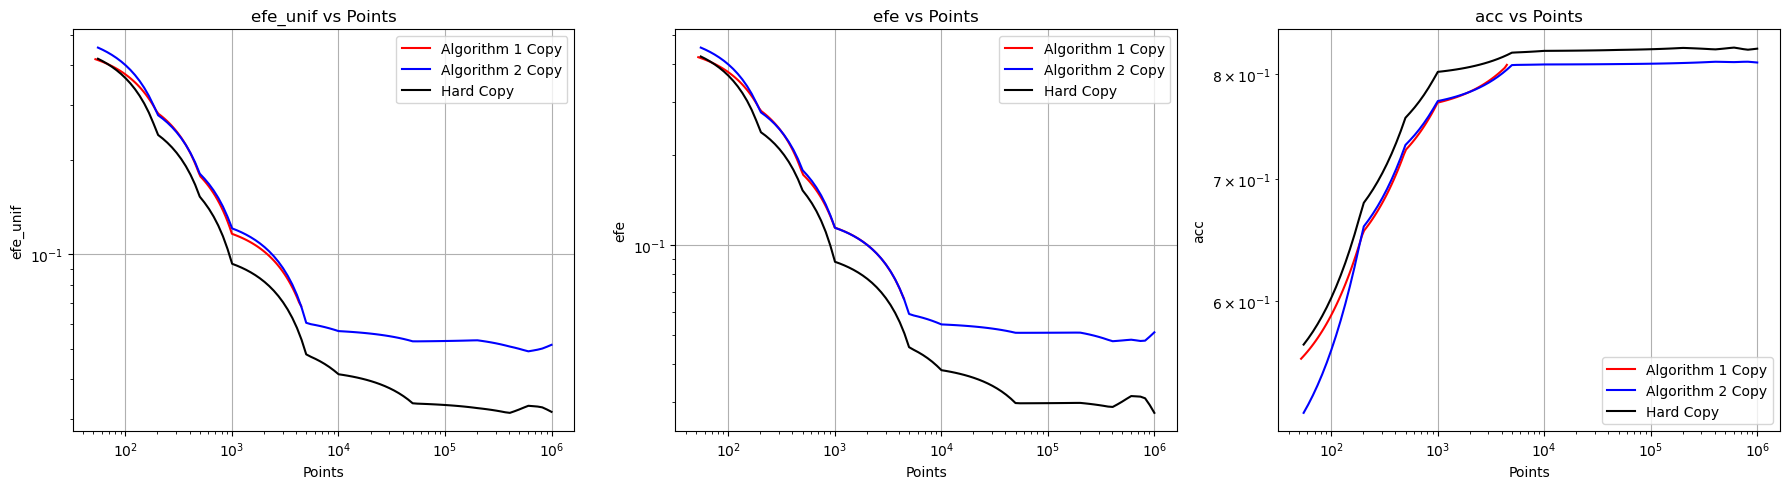

   model acc m. acc std. efe m. efe std. efe_unif m. efe_unif std.       pts m. pts std.
 Model 1 0.8108   0.0108 0.0632   0.0064      0.0649        0.0046    4674.6000 169.8548
 Model 2 0.8120   0.0121 0.0512   0.0042      0.0516        0.0068 1000000.0000   0.0000
 Model 3 0.8264   0.0113 0.0276   0.0022      0.0315        0.0035 1000000.0000   0.0000
Blackbox 0.8316   0.0130                                                                


In [56]:
# Combined plots averaging all files
summary_df = plot_all_results("../results", "results_DS3_3_4_seed")
print(summary_df.to_string(index=False))